# Mobile Price Prediciton Task

There are over 13 billion mobile phones in the world in 2019 because they became more accessible and cheap but have you ever wondered what makes a mobile phone expensive? Is it the battery life? Camera quality? Dual sim support? Surely, having better features would make a phone more expensive but by how much?

You will explore and predict mobile phone pricing using PyTorch, an open-source machine learning library developed by Facebook. You are to use the things that you learned about neural networks to predict the price range of a mobile phone.

For this exercise, you will use the Mobile Price Classification DataSet in Kaggle. The data contains 20 features and one label column containing the price category of a phone. Your task is to make a model that predicts the price range of a mobile phone given its features with the highest accuracy.

In order to pass this, your model should perform with an accuracy greater than 60. Play around with the parameters that you are choosing and take note of what works best.

Load the train data set.
Split it to 80% and 20% for training and testing respectively.
Define batch size = 100 and number of iterations = 80.
Load the train and test data using Dataloader in PyTorch.
Make it iterable.
Create a model class using a Logistic Regression model.
Instantiate the model class.
Instantiate the loss class.
Instantiate the optimizer class.
Train the model.
Print the loss and accuracy per epoch.
Test your model on the test dataset and put it in a csv file following the given format. You will be given ten submission entries, use it well.

## Exploring data

### Vizualization

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [162]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [163]:
df_train.shape,len(df_train)

((2000, 21), 2000)

In [164]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [166]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

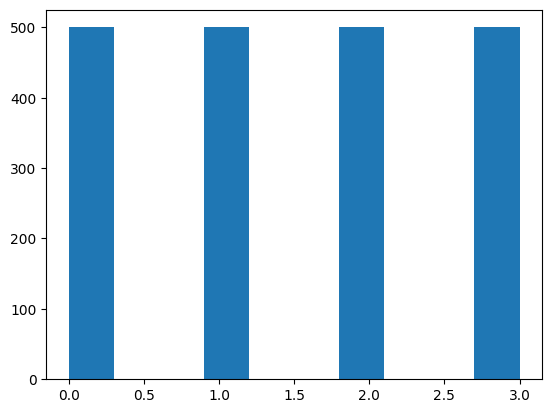

In [167]:
plt.hist(df_train['price_range'])

(array([237., 217., 197., 179., 196., 205., 203., 183., 193., 190.]),
 array([ 2. ,  8.2, 14.4, 20.6, 26.8, 33. , 39.2, 45.4, 51.6, 57.8, 64. ]),
 <BarContainer object of 10 artists>)

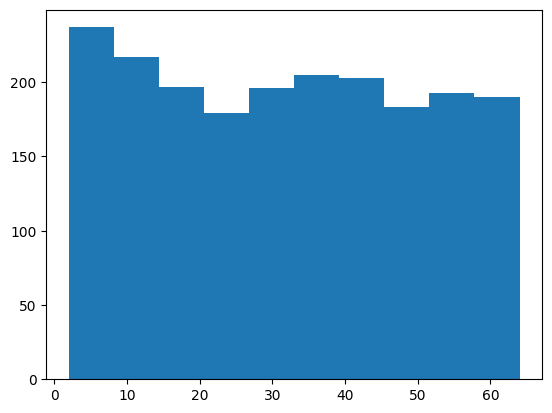

In [168]:
plt.hist(df_train['int_memory'])

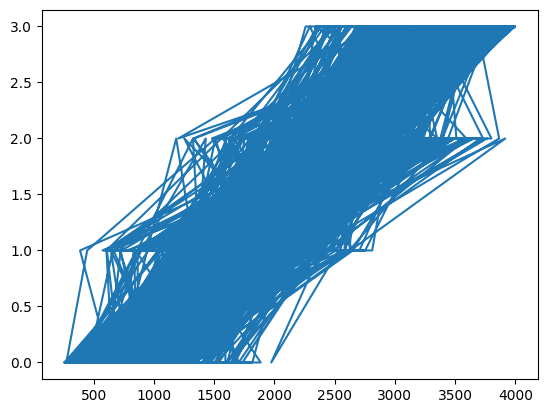

In [169]:
plt.plot(df_train['ram'],df_train['price_range'])

### Correlation

In [170]:
correlation_matrix = df_train.corr()

In [171]:
correlation_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Now we want to get features that are most correlated with our output value - 'price_range'

In [172]:
correlation_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

So let's say that treshold is 10% of correlation, so we will use everything that is above that.

In [173]:
features_high_corr = correlation_matrix.index[correlation_matrix['price_range'].abs() > 0.1]

In [174]:
mobile_train = df_train[features_high_corr]

In [175]:
mobile_train.head()

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1


We also need to transform test data into same format. We should not include price_range here cause there is no such column in test.csv.

In [176]:
mobile_test = df_test[features_high_corr[:-1]]

In [177]:
mobile_test.head()

,battery_power,px_height,px_width,ram
0,1043,226,1412,3476
1,841,746,857,3895
2,1807,1270,1366,2396
3,1546,295,1752,3893
4,1434,749,810,1773


Now we succesfully finished our extraction of features from the raw dataset. Next step is preprocessing data and making our model after that.

## Making train and test data

In [204]:
X_train = mobile_train[['battery_power', 'px_height', 'px_width', 'ram']]
X_test = mobile_test[['battery_power', 'px_height', 'px_width', 'ram']]

## X_train, X_val, y_train, y_val

In [205]:
import sys
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch import nn
import torch.nn.functional as F

from torchvision.transforms import ToTensor

In [206]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)

We dont have y_test, cause in test.csv we dont have price_range column, so we will need to create validation data form train data.

In [207]:
y_train = torch.tensor(mobile_train['price_range'].values, dtype=torch.int64)

In [208]:
dataset = TensorDataset(X_train, y_train)

In [209]:
total_length = len(dataset)
train_size = int(0.8 * total_length)
val_size = total_length - train_size

In [210]:
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [211]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [229]:
model = nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10,25),
    nn.ReLU(),
    nn.Linear(25, 10),
    nn.ReLU(),
    nn.Linear(10, 4)
)

In [230]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1000

In [231]:
train_losses = []
for i in range(num_epochs):
    train_loss  = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 4))
        y = F.one_hot(y, num_classes=4).type(torch.float32).squeeze(1)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()
    if i % 25 == 0:
        train_losses.append(train_loss  / len(train_dataloader))
        print(train_loss)

1181.9416097402573
51.95761054754257
48.61034607887268
47.7091720700264
46.60013473033905
46.638483226299286
47.09679716825485
45.937152445316315
45.30733162164688
46.27731263637543
44.8688725233078
44.11854439973831
33.78722032904625
23.8350947201252
18.68456706404686
15.72794485092163
13.969870910048485
15.345442369580269
10.670173175632954
8.511423513293266
8.092809826135635
7.37571631744504
6.867836512625217
7.360539857298136
8.344069931656122
6.354018874466419
6.309420917183161
6.059975698590279
6.75879355892539
6.402457989752293
5.718450363725424
7.147037969902158
8.47772098146379
7.231015304103494
6.048660609871149
5.876100039109588
7.000896159559488
7.222089929506183
5.6289539989084005
5.562630012631416


In [232]:
val_losses = []
model.eval()
for i in range(num_epochs):
    with torch.no_grad():
        accurate = 0
        total = 0
        val_loss = 0
        for X, y in val_dataloader:
            X = X.reshape((-1, 4))
            # y = F.one_hot(y, num_classes=10).type(torch.float32)
            outputs = nn.functional.softmax(model(X),dim=1)
            
            correct_pred = (y == outputs.max(dim=1).indices)
            total+=correct_pred.size(0)
            accurate+=correct_pred.type(torch.int).sum().item()
            loss = loss_fn(outputs, y)
            val_loss += loss.item()
        if i % 25 == 0:
            print(val_loss)
            val_losses.append(val_loss / len(val_dataloader))
print(accurate / total)

10.577222645282745
10.557701647281647
10.600928544998169
10.59434974193573
10.567759096622467
10.564060807228088
10.571618258953094
10.58651602268219
10.567539155483246
10.57510906457901
10.588440775871277
10.55506557226181
10.578139066696167
10.568590581417084
10.56269633769989
10.568304419517517
10.57697457075119
10.570205450057983
10.589852452278137
10.570514380931854
10.551126182079315
10.564110934734344
10.558046579360962
10.58656895160675
10.543759286403656
10.561078429222107
10.601777613162994
10.565694689750671
10.57778149843216
10.573057353496552
10.57193511724472
10.573599636554718
10.59090530872345
10.559251368045807
10.559452176094055
10.579697668552399
10.606512069702148
10.573814034461975
10.563892424106598
10.575467824935913
0.9425


## Vizualization of loss in train and validation data

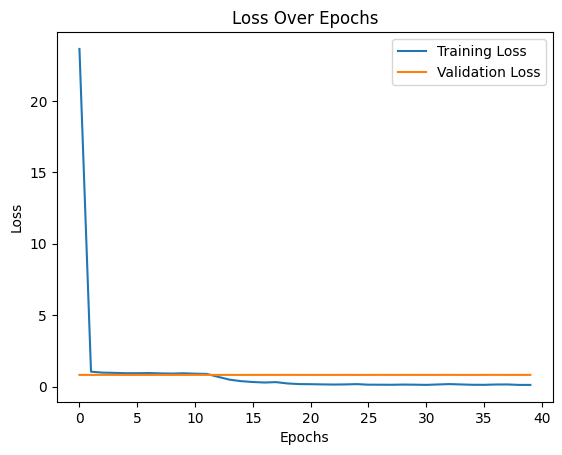

In [233]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()